# BIAS ANALYSIS

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
periods = ['Q1', 'Q2', 'Q3', 'A1', 'A2']

In [4]:
data = {}
for period in periods:
    data[period] = pd.read_csv(f"results/{period}_rf.csv")

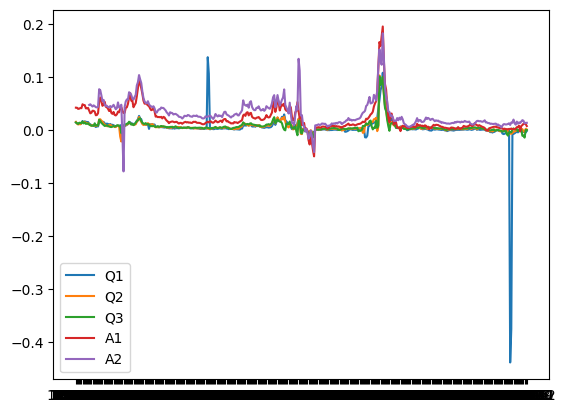

In [42]:
#range(0,len(results_rolling[period].groupby(['Date']).biased_expectation.mean()))
plt.Figure(figsize=(15,8))
for period, df in data.items():
    plt.plot(data[period].Date.unique().astype(str), data[period].groupby(['Date']).biased_expectation.mean(), label=period);
    plt.legend()

In [35]:
def compute_bias_results ( period):
    df = data[period]
    RF = df.predicted_adj_actual.mean()
    AF = df.adj_meanest.mean()
    AE = df.adj_actual.mean()
    RF_AE = (df.predicted_adj_actual - df.adj_actual).mean()
    AF_AE = (df.adj_meanest - df.adj_actual).mean()
    RF_AE2 = ((df.predicted_adj_actual - df.adj_actual)**2).mean()
    AF_AE2 = ((df.adj_meanest - df.adj_actual)**2).mean()
    bias = ((df.adj_meanest - df.predicted_adj_actual) / df.price).mean()

    return {'value': period,'RF': round(RF, 3), 'AF': round(AF, 3), 'AE':round(AE, 3),'(RF-AE)':round(RF_AE, 3), '(AF-AE)':round(AF_AE, 3),
    '(RF-AE)^2':round(RF_AE2, 3), '(AF-AE)^2': round(AF_AE2, 3), '(AF-RF)/P':round(bias, 3), 'N':len(df) }



    

In [36]:
# Create an empty dictionary to store DataFrames
results = []

for period in periods:
    results.append(compute_bias_results(period))

In [39]:
display(pd.DataFrame(results).set_index('value').rename_axis(None))

,RF,AF,AE,(RF-AE),(AF-AE),(RF-AE)^2,(AF-AE)^2,(AF-RF)/P,N
Q1,0.248,0.271,0.251,-0.003,0.020,0.133,0.220,0.004,929031
Q2,0.262,0.311,0.265,-0.003,0.046,0.156,0.161,0.006,844649
Q3,0.278,0.344,0.279,-0.001,0.065,0.185,0.220,0.006,775727
A1,0.925,1.052,0.932,-0.007,0.121,0.467,0.600,0.021,972684
A2,1.044,1.385,1.046,-0.002,0.339,1.080,1.844,0.030,814539
